In [1]:
%%capture [--no-stdout]
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from itables import init_notebook_mode, show
init_notebook_mode(all_interactive=True)
init_notebook_mode(connected=True)
import itables.options as opt

opt.classes="display nowrap compact"
opt.buttons=["copyHtml5", "csvHtml5", "excelHtml5"]
opt.maxBytes=0
%env FHIR_BASE= https://google-fhir.fhir-aggregator.org
!fq vocabulary vocabulary.tsv --fhir-base-url $FHIR_BASE
df = pd.read_csv('vocabulary.tsv', sep='\t').fillna('')

# Visualize the [CodeableConcept](https://hl7.org/fhir/R4B/datatypes.html#CodeableConcept) used in each resource

FHIR CodeableConcepts are essential for representing and exchanging healthcare information using codes and terminologies. They ensure interoperability, provide semantic meaning, offer flexibility, and enhance human understanding of healthcare data.

In [2]:
combined_counts = df[['research_study_identifiers', 'path', 'system',  'display', 'count']]
# Filter combined_counts to ignore rows with 'extension' in 'path'
combined_counts = combined_counts[~combined_counts['path'].str.contains('extension')]

combined_counts

,research_study_identifiers,path,system,display,count
0,ICGC-LUCA_KR,ServiceRequest.category,http://snomed.info/sct,Laboratory procedure,15063.0
1,ICGC-LUCA_KR,ServiceRequest.code,http://snomed.info/sct,Laboratory test,15063.0
2,ICGC-LUCA_KR,DocumentReference.type,https://aced-idp.org/ICGC-LUCA_KR,TGZ,10120.0
3,ICGC-LUCA_KR,DocumentReference.category,https://aced-idp.org/ICGC-LUCA_KR/data_type,Aligned Reads QC,3265.0
4,ICGC-LUCA_KR,DocumentReference.securityLabel,http://terminology.hl7.org/CodeSystem/v3-Confi...,normal,15063.0
...,...,...,...,...,...
21829,HCMI-CMDC,MedicationAdministration.medicationCodeableCon...,https://gdc.cancer.gov/therapeutic_agents,Dabrafenib,3.0
21830,HCMI-CMDC,MedicationAdministration.medicationCodeableCon...,https://gdc.cancer.gov/therapeutic_agents,Monalizumab,1.0
21831,HCMI-CMDC,MedicationAdministration.medicationCodeableCon...,https://gdc.cancer.gov/therapeutic_agents,Andecaliximab,1.0
21832,HCMI-CMDC,MedicationAdministration.medicationCodeableCon...,https://gdc.cancer.gov/therapeutic_agents,Vinblastine,2.0


## Create heatmap for each path

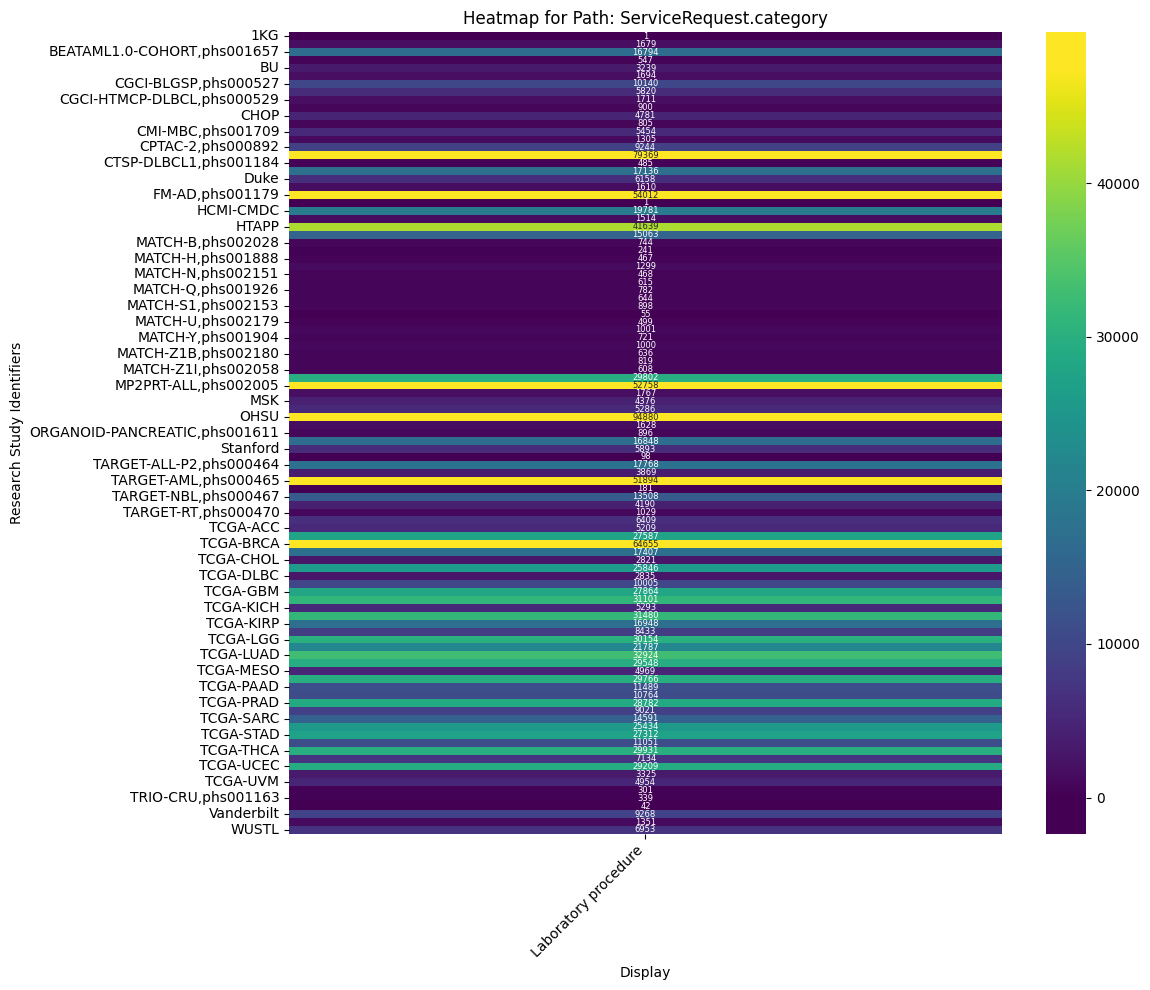

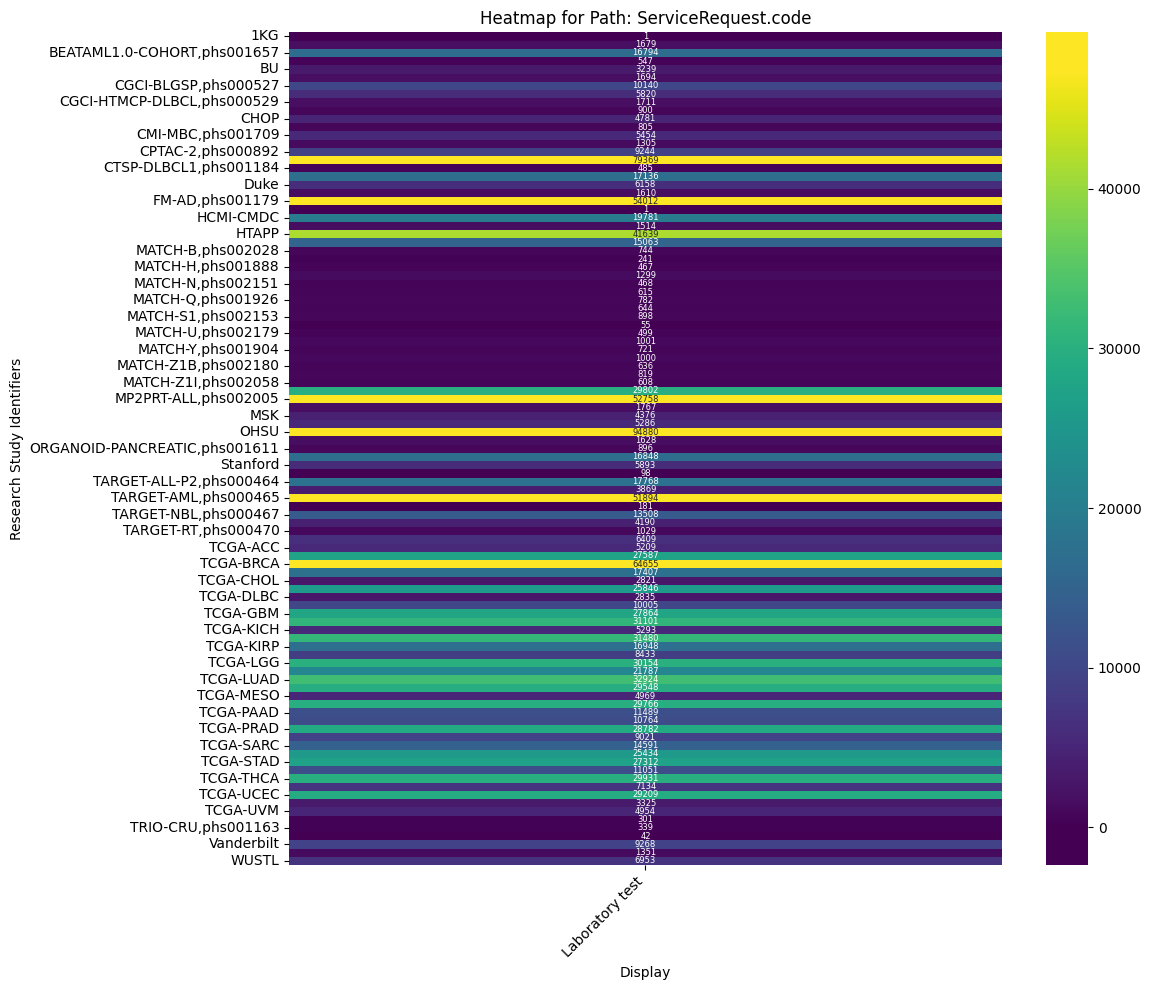

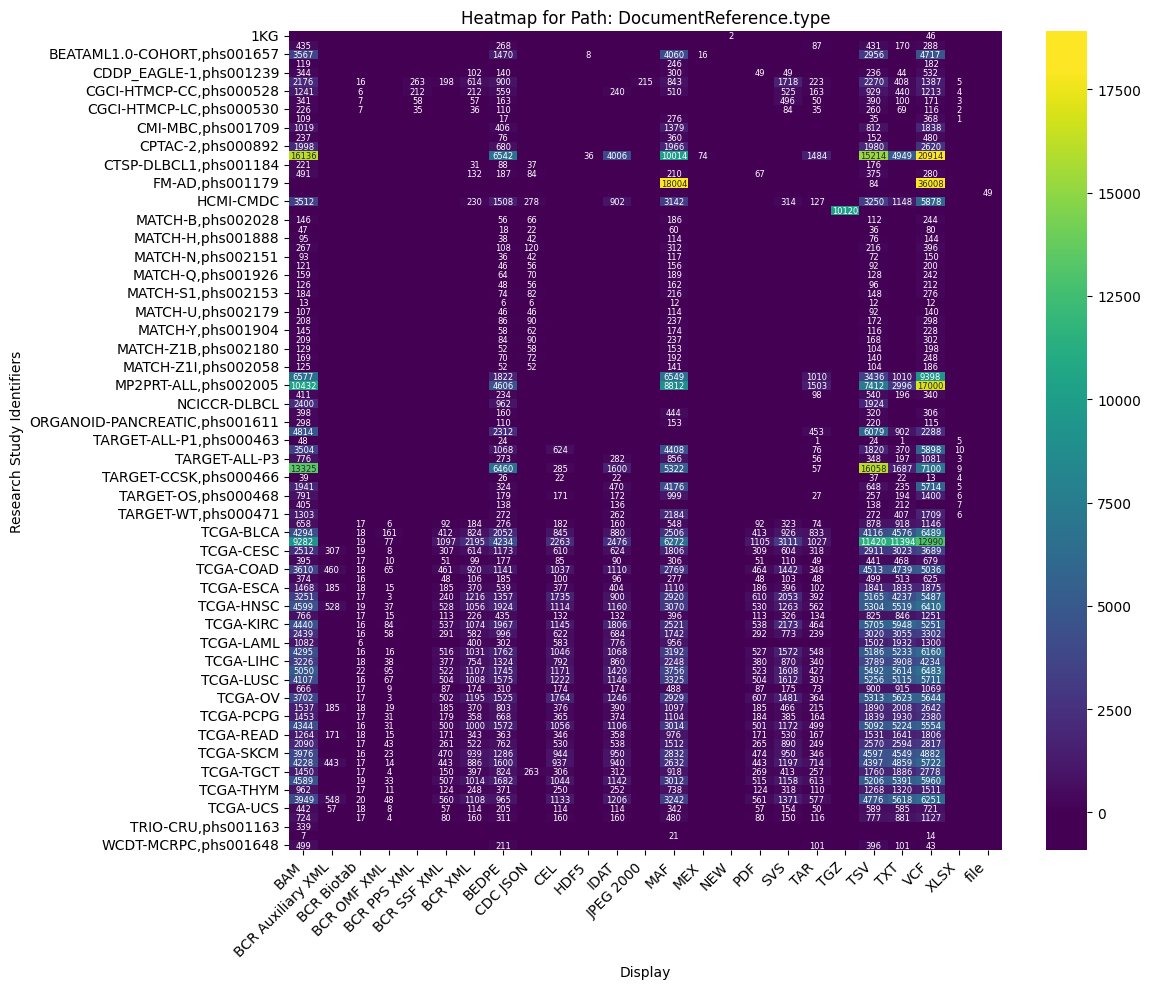

In [ ]:
# Get unique paths
unique_paths = combined_counts['path'].unique()
combined_counts = combined_counts.infer_objects(copy=False)

# Create a heatmap for each path
for path in unique_paths:
    # Filter data for the current path
    filtered_data = combined_counts[combined_counts['path'] == path]

    # Pivot the filtered data for the heatmap
    heatmap_data = filtered_data.pivot_table(index='research_study_identifiers',
                                            columns=['display'],
                                            values='count',
                                            fill_value=0.0)

    # Create the heatmap
    plt.figure(figsize=(12, 10))  # Adjust figsize as needed

    # sns.heatmap(heatmap_data, annot=True, annot_kws={"size": 6}, fmt=".0f", cmap='viridis', cbar=False)

    # Create a mask to identify zero values
    mask = heatmap_data == 0

 # Custom function to format annotations
    def heatmap_annot(val, **kwargs):
        if val == 0:  # Hide annotations for zero values
            return ""
        else:
            return f"{val:.0f}"  # Format non-zero values as integers


    # Generate heatmap with the custom annotation function
    ax = sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap='viridis',
                cbar_kws={'extend': 'both', 'extendrect': True},
                vmin=0,  # Set minimum value for color scale
                vmax=heatmap_data.max().max() / 2,  # Adjust maximum value
                annot_kws={"size": 6})  # Reduce font size


    # Apply the custom annotation function to each cell
    for text in ax.texts:
        text.set_text(heatmap_annot(float(text.get_text())))

    plt.title(f'Heatmap for Path: {path}')  # Set title with path name
    plt.xlabel('Display')
    plt.ylabel('Research Study Identifiers')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
